<a href="https://colab.research.google.com/github/GLuarte/Data-Science-1/blob/main/idealista_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regression project
### Gonzalo Luart - Javier Pulido

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn import neighbors
from math import sqrt
import seaborn as sns
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

### Quick Data Analysis

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data/IdealistaPrep.csv',index_col=0)

After importing the already preprocesed dataset, it gets shuffled

In [ ]:
df = pd.DataFrame(shuffle(df))

Then it is time to generate a correlation matrix to figure out the importance of each numerical and binary variables

In [ ]:
corr_matrix = abs(df.drop('prices',axis=1).corr()[['log_prices']]).sort_values('log_prices')

The correlation matrix gets plotted as a heatmap which shows yellower the more correlated variables whereas the greener are less correlated

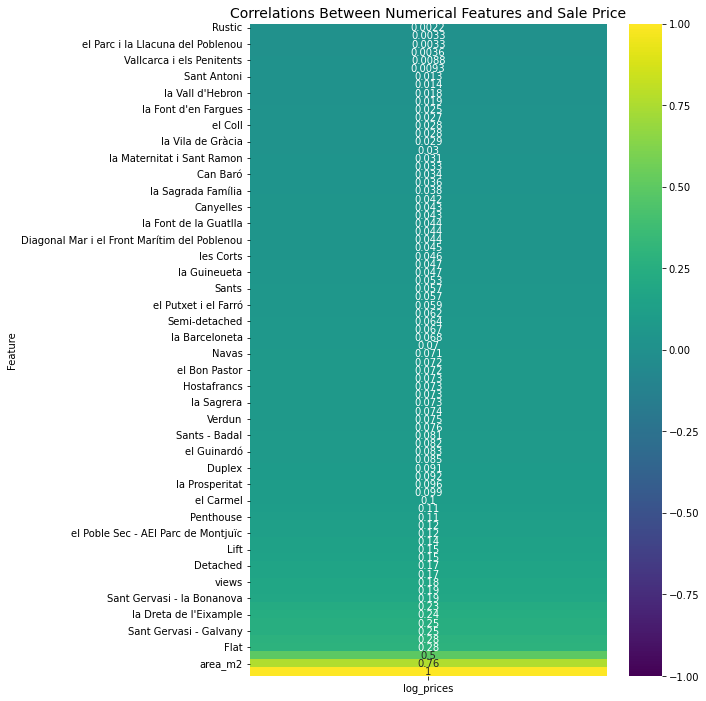

In [ ]:
plt.figure(figsize=(8, 12))
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, cmap = 'viridis')
plt.title('Correlations Between Numerical Features and Sale Price', fontdict={'fontsize':14})
plt.ylabel('Feature');

After the feature correlation analysis, the more correlated features gets selected and the other gets dropped

In [ ]:
corr_target = abs(corr_matrix)
salient_num_features = corr_target.loc[corr_target['log_prices'] > .05, :]

In [ ]:
salient_num_features

,log_prices
el Clot,0.052629
Sants,0.057136
Provençals del Poblenou,0.057165
el Putxet i el Farró,0.058932
Can Peguera,0.062215
Semi-detached,0.063773
la Teixonera,0.067343
la Barceloneta,0.068413
el Congrés i els Indians,0.070056
Navas,0.071306


In [ ]:
df2=df.copy()

In [ ]:
fin_feat=(list(salient_num_features.index))

In [ ]:
y=np.array(df.pop('log_prices'))
df=df.drop('prices',axis=1)
df=df[fin_feat[:-1]]
X=df
#X=pd.DataFrame(df[['area_m2','rooms','House','Flat','floor','Detached','condition','Sarrià-Sant Gervasi','Sants-Montjuïc','Sant Martí','Horta-Guinardó','Nou Barris','Sant Andreu','Ciutat Vella','Gràcia','Eixample','Les Corts','views','Lift']])

Since the current dataset has unbalanced numbers, taking for example, price and area or area and floor. It is appropiate to normalize the values

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,shuffle=True)

In [ ]:
results=pd.DataFrame(columns=['model','r2 score','mean sqrd error'])

### Linear Regression

In [ ]:
lin_regr = linear_model.LinearRegression()
lin_regr.fit(X_train, y_train)
lin_pred = lin_regr.predict(X_test)

In [ ]:
# # The coefficients
# print("Coefficients: \n", lin_regr.coef_)
# # The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, lin_pred))
# # The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, lin_pred))

a={'model':'Linear Regression','r2 score':r2_score(y_test, lin_pred),'mean sqrd error':mean_squared_error(y_test, lin_pred)}
results=results.append(a,ignore_index=True)
results

Mean squared error: 0.10
Coefficient of determination: 0.81


,model,r2 score,mean sqrd error
0,Linear Regression,0.813346,0.099819


In [ ]:
coeff_df = pd.DataFrame(lin_regr.coef_, df.columns, columns=['Coefficient'])
coeff_df.sort_values('Coefficient',axis=0,ascending=False)

,Coefficient
area_m2,3.592714
rooms,0.553059
les Tres Torres,0.516554
condition,0.473635
la Dreta de l'Eixample,0.409686
Sant Gervasi - Galvany,0.384469
l'Antiga Esquerra de l'Eixample,0.325664
Pedralbes,0.322489
Sant Gervasi - la Bonanova,0.308112
Sarrià,0.282552


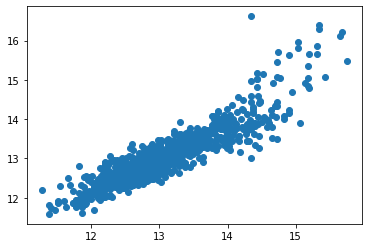

In [ ]:
plt.scatter(y_test,lin_pred)

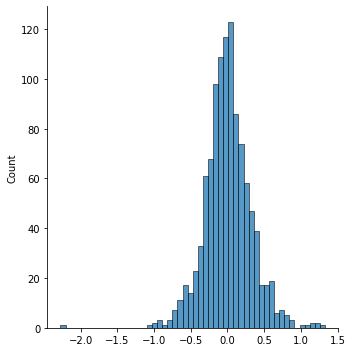

In [ ]:
sns.displot((y_test-lin_pred),)

### KNN Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(30):
    K = K+1
    knn_model = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn_model.fit(X_train, y_train)  #fit the model
    knn_pred=knn_model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,knn_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.3637962910317194
RMSE value for k=  2 is: 0.341657908849732
RMSE value for k=  3 is: 0.34257390155628825
RMSE value for k=  4 is: 0.3500192732443949
RMSE value for k=  5 is: 0.35784197504059534
RMSE value for k=  6 is: 0.36721027410713447
RMSE value for k=  7 is: 0.3727268217059492
RMSE value for k=  8 is: 0.3821546188754759
RMSE value for k=  9 is: 0.38947407151878566
RMSE value for k=  10 is: 0.39543862769980653
RMSE value for k=  11 is: 0.3960542803106949
RMSE value for k=  12 is: 0.3982142609241452
RMSE value for k=  13 is: 0.40115123254146584
RMSE value for k=  14 is: 0.40357979776921
RMSE value for k=  15 is: 0.40341011564871954
RMSE value for k=  16 is: 0.40488792190731393
RMSE value for k=  17 is: 0.40651609283155177
RMSE value for k=  18 is: 0.40946289595132684
RMSE value for k=  19 is: 0.41223079786191846
RMSE value for k=  20 is: 0.4145840386271266
RMSE value for k=  21 is: 0.4175389515127905
RMSE value for k=  22 is: 0.4189446898103153
RMSE value 

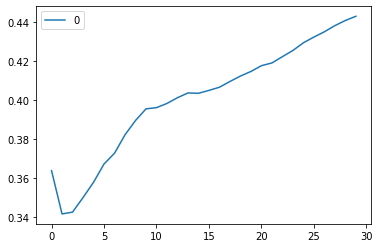

In [ ]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
ks=[]
for i in range(2,15):
  ks.append(i)


In [ ]:
from sklearn.model_selection import GridSearchCV
#params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
params = {'n_neighbors':ks}
knn = neighbors.KNeighborsRegressor()

grd_model = GridSearchCV(knn, params, cv=5)
grd_model.fit(X_train,y_train)
grd_model.best_params_

{'n_neighbors': 2}

In [ ]:
k_model = KNeighborsRegressor(grd_model.best_params_['n_neighbors']) 
k_model.fit(X_train, y_train)
k_pred=k_model.predict(X_test)

In [ ]:
# The coefficients
#print("Coefficients: \n", k_model.coef_)
# The mean squared error
# print("Mean squared error: %.2f" % mean_squared_error(y_test, k_pred))
# # The coefficient of determination: 1 is perfect prediction
# print("Coefficient of determination: %.2f" % r2_score(y_test, k_pred))

a={'model':'KNN','r2 score':r2_score(y_test, k_pred),'mean sqrd error':mean_squared_error(y_test, k_pred)}
results=results.append(a,ignore_index=True)
results

,model,r2 score,mean sqrd error
0,Linear Regression,0.813346,0.099819
1,KNN,0.781724,0.116730


In [ ]:
k_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'uniform'}

###Decision Tree Regression

In [ ]:
depth=7
tree_regr=DecisionTreeRegressor(max_depth=depth)
tree_regr.fit(X_train, y_train)
tree_pred=tree_regr.predict(X_test)

In [ ]:
a={'model':'Decision Tree','r2 score':r2_score(y_test, tree_pred),'mean sqrd error':mean_squared_error(y_test, tree_pred)}
results=results.append(a,ignore_index=True)
results
# print("Coefficient of determination: %.2f" % r2_score(y_test, tree_pred))
# #print("Coefficient of determination: %.2f" % r2_score(y_test, ada_pred2))

,model,r2 score,mean sqrd error
0,Linear Regression,0.813346,0.099819
1,KNN,0.781724,0.116730
2,Decision Tree,0.814525,0.099189


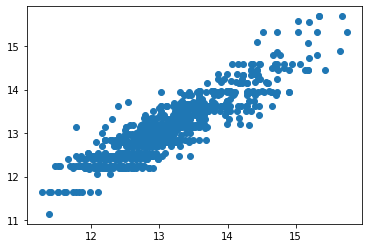

In [ ]:
plt.scatter(y_test,tree_pred)

### Random Forest Regression

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)

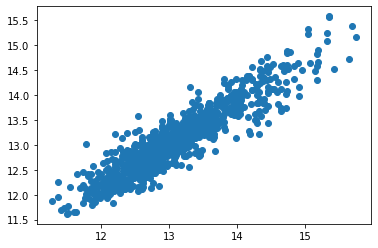

In [ ]:
plt.scatter(y_test,rf_pred)

In [ ]:
# The coefficients
#print("Coefficients: \n", k_model.coef_)
# The mean squared error
# print("Mean squared error: %.2f" % mean_squared_error(y_test, k_pred))
# # The coefficient of determination: 1 is perfect prediction
# print("Coefficient of determination: %.2f" % r2_score(y_test, k_pred))

a={'model':'Random Forest','r2 score':r2_score(y_test, rf_pred),'mean sqrd error':mean_squared_error(y_test, rf_pred)}
results=results.append(a,ignore_index=True)
results

,model,r2 score,mean sqrd error
0,Linear Regression,0.813346,0.099819
1,KNN,0.781724,0.116730
2,Decision Tree,0.814525,0.099189
3,Random Forest,0.850735,0.079824


In [ ]:
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image 
tree = rf.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = df.columns, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')


In [ ]:
graph.write_png('tree.png')

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(df.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: area_m2              Importance: 0.772
Variable: condition            Importance: 0.063
Variable: rooms                Importance: 0.027
Variable: Lift                 Importance: 0.019
Variable: floor                Importance: 0.011
Variable: Pedralbes            Importance: 0.01
Variable: Sant Gervasi - Galvany Importance: 0.01
Variable: l'Antiga Esquerra de l'Eixample Importance: 0.009
Variable: la Dreta de l'Eixample Importance: 0.009
Variable: la Verneda i la Pau  Importance: 0.005
Variable: views                Importance: 0.004
Variable: Flat                 Importance: 0.004
Variable: el Putxet i el Farró Importance: 0.003
Variable: el Besòs i el Maresme Importance: 0.003
Variable: la Trinitat Nova     Importance: 0.003
Variable: Penthouse            Importance: 0.003
Variable: Sarrià               Importance: 0.003
Variable: el Raval             Importance: 0.003
Variable: Sant Gervasi - la Bonanova Importance: 0.003
Variable: Sants                Importance: 0.002


### AdaBoost Regression

In [ ]:
ada_regr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=depth), n_estimators=100, random_state=0)

ada_regr.fit(X_train, y_train)
ada_pred=ada_regr.predict(X_test)

In [ ]:
a={'model':'AdaBoost','r2 score':r2_score(y_test, ada_pred),'mean sqrd error':mean_squared_error(y_test, ada_pred)}
results=results.append(a,ignore_index=True)
results

# The coefficients
#print("Coefficients: \n", ada_regr.coef_)
# The mean squared error
# print("Mean squared error: %.2f" % mean_squared_error(y_test, ada_pred))
# # The coefficient of determination: 1 is perfect prediction
# print("Coefficient of determination: %.2f" % r2_score(y_test, ada_pred))

,model,r2 score,mean sqrd error
0,Linear Regression,0.813346,0.099819
1,KNN,0.781724,0.116730
2,Decision Tree,0.814525,0.099189
3,Random Forest,0.850735,0.079824
4,AdaBoost,0.831919,0.089886


In [ ]:
coeff_df = pd.DataFrame(ada_regr.feature_importances_, df.columns, columns=['Coefficient'])
coeff_df

,Coefficient
el Clot,0.000215
Sants,0.005147
Provençals del Poblenou,0.000122
el Putxet i el Farró,0.004504
Can Peguera,0.005438
Semi-detached,0.000102
la Teixonera,0.003019
la Barceloneta,0.000091
el Congrés i els Indians,0.000000
Navas,0.000014


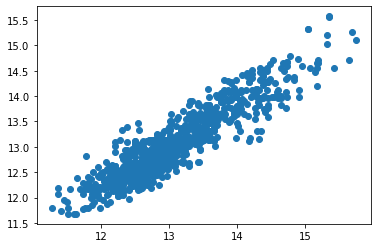

In [ ]:
plt.scatter(y_test,ada_pred)

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=600, 
    max_depth=5, 
    learning_rate=0.01, 
    min_samples_split=3)
# with default parameters
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
gbr_pred=gbr.predict(X_test)

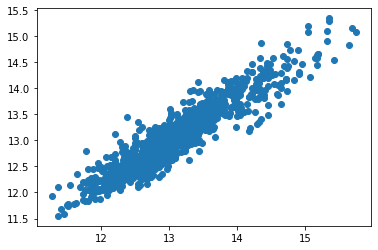

In [ ]:
plt.scatter(y_test,gbr_pred)

In [ ]:
# # The coefficients
# #print("Coefficients: \n", k_model.coef_)
# # The mean squared error
# print("Mean squared error: %.2f" % mean_squared_error(y_test, svr_pred))
# # The coefficient of determination: 1 is perfect prediction
# print("Coefficient of determination: %.2f" % r2_score(y_test, svr_pred))

a={'model':'Gradient Boosting','r2 score':r2_score(y_test, gbr_pred),'mean sqrd error':mean_squared_error(y_test, gbr_pred)}
results=results.append(a,ignore_index=True)
results

,model,r2 score,mean sqrd error
0,Linear Regression,0.813346,0.099819
1,KNN,0.781724,0.116730
2,Decision Tree,0.814525,0.099189
3,Random Forest,0.850735,0.079824
4,AdaBoost,0.831919,0.089886
5,Gradient Boosting,0.862483,0.073542


### SVM Regression

#### RBF

In [ ]:
from sklearn.svm import SVR
svrrbf_model = SVR(kernel='rbf')
svrrbf_model.fit(X_train,y_train)
svrrbf_pred=svrrbf_model.predict(X_test)

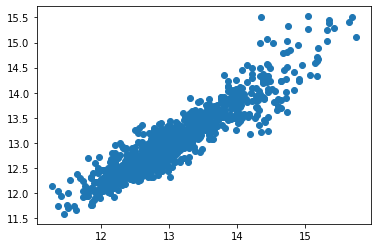

In [ ]:
plt.scatter(y_test,svrrbf_pred)

In [ ]:
# # The coefficients
# #print("Coefficients: \n", k_model.coef_)
# # The mean squared error
# print("Mean squared error: %.2f" % mean_squared_error(y_test, svr_pred))
# # The coefficient of determination: 1 is perfect prediction
# print("Coefficient of determination: %.2f" % r2_score(y_test, svr_pred))

a={'model':'SVR-rbf','r2 score':r2_score(y_test, svrrbf_pred),'mean sqrd error':mean_squared_error(y_test, svrrbf_pred)}
results=results.append(a,ignore_index=True)
results

,model,r2 score,mean sqrd error
0,Linear Regression,0.813346,0.099819
1,KNN,0.781724,0.116730
2,Decision Tree,0.814525,0.099189
3,Random Forest,0.850735,0.079824
4,AdaBoost,0.831919,0.089886
5,Gradient Boosting,0.862483,0.073542
6,SVR-rbf,0.846350,0.082169


#### Linear

In [ ]:
svrlin_model = SVR(kernel='linear')
svrlin_model.fit(X_train,y_train)
svrlin_pred=svrlin_model.predict(X_test)

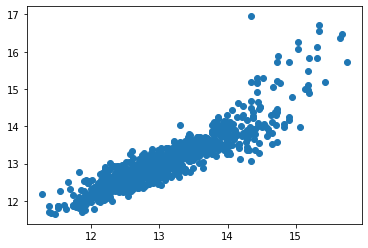

In [ ]:
plt.scatter(y_test,svrlin_pred)

In [ ]:
# # The coefficients
# #print("Coefficients: \n", k_model.coef_)
# # The mean squared error
# print("Mean squared error: %.2f" % mean_squared_error(y_test, svr_pred))
# # The coefficient of determination: 1 is perfect prediction
# print("Coefficient of determination: %.2f" % r2_score(y_test, svr_pred))

a={'model':'SVR-lin','r2 score':r2_score(y_test, svrlin_pred),'mean sqrd error':mean_squared_error(y_test, svrlin_pred)}
results=results.append(a,ignore_index=True)
results

,model,r2 score,mean sqrd error
0,Linear Regression,0.813346,0.099819
1,KNN,0.781724,0.116730
2,Decision Tree,0.814525,0.099189
3,Random Forest,0.850735,0.079824
4,AdaBoost,0.831919,0.089886
5,Gradient Boosting,0.862483,0.073542
6,SVR-rbf,0.846350,0.082169
7,SVR-lin,0.806810,0.103314


#### Poly

In [ ]:
svrpoly_model = SVR(kernel='poly')
svrpoly_model.fit(X_train,y_train)
svrpoly_pred=svrpoly_model.predict(X_test)

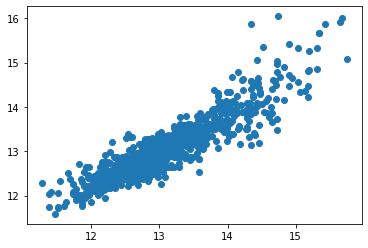

In [ ]:
plt.scatter(y_test,svrpoly_pred)

In [ ]:
# # The coefficients
# #print("Coefficients: \n", k_model.coef_)
# # The mean squared error
# print("Mean squared error: %.2f" % mean_squared_error(y_test, svr_pred))
# # The coefficient of determination: 1 is perfect prediction
# print("Coefficient of determination: %.2f" % r2_score(y_test, svr_pred))

a={'model':'SVR-poly','r2 score':r2_score(y_test, svrpoly_pred),'mean sqrd error':mean_squared_error(y_test, svrpoly_pred)}
results=results.append(a,ignore_index=True)
results

,model,r2 score,mean sqrd error
0,Linear Regression,0.813346,0.099819
1,KNN,0.781724,0.116730
2,Decision Tree,0.814525,0.099189
3,Random Forest,0.850735,0.079824
4,AdaBoost,0.831919,0.089886
5,Gradient Boosting,0.862483,0.073542
6,SVR-rbf,0.846350,0.082169
7,SVR-lin,0.806810,0.103314
8,SVR-poly,0.830948,0.090406


### MultiLayerPerceptron Regression

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
#X, y = make_regression(n_samples=200, random_state=1)
mlp = MLPRegressor(random_state=1, max_iter=500)
mlp.fit(X_train, y_train)
mlp_pred=mlp.predict(X_test)


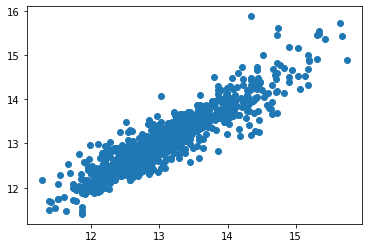

In [ ]:
plt.scatter(y_test,mlp_pred)

In [ ]:
# # The coefficients
# #print("Coefficients: \n", k_model.coef_)
# # The mean squared error
# print("Mean squared error: %.2f" % mean_squared_error(y_test, svr_pred))
# # The coefficient of determination: 1 is perfect prediction
# print("Coefficient of determination: %.2f" % r2_score(y_test, svr_pred))

a={'model':'MLP','r2 score':r2_score(y_test, mlp_pred),'mean sqrd error':mean_squared_error(y_test, mlp_pred)}
results=results.append(a,ignore_index=True)
results

,model,r2 score,mean sqrd error
0,Linear Regression,0.813346,0.099819
1,KNN,0.781724,0.116730
2,Decision Tree,0.814525,0.099189
3,Random Forest,0.850735,0.079824
4,AdaBoost,0.831919,0.089886
5,Gradient Boosting,0.862483,0.073542
6,SVR-rbf,0.846350,0.082169
7,SVR-lin,0.806810,0.103314
8,SVR-poly,0.830948,0.090406
9,MLP,0.835430,0.088009


As you might see, there are pretty similar $r^{2}$ values for each model and the worst one is the KNN model, on the other hand the better results were reached with both Random Forest Model and Gradient Boosting, showing very similar $r^{2}$ and $MSE$ error values. This methods behave very similar and both of them work making decision trees, so that would explain the very close results